In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV, LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
pf = ProfileReport(df)
pf.to_widgets()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df["BMI"] = df["BMI"].replace(0, df.BMI.mean())

In [7]:
df["BloodPressure"] = df["BloodPressure"].replace(0, df["BloodPressure"].mean())

In [8]:
df["Insulin"] = df["Insulin"].replace(0, df["Insulin"].mean())

In [9]:
df["Glucose"] = df["Glucose"].replace(0, df["Glucose"].mean())

In [10]:
df["SkinThickness"] = df["SkinThickness"].replace(0, df["SkinThickness"].mean())

In [11]:
pf2 = ProfileReport(df)
pf2.to_widgets()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

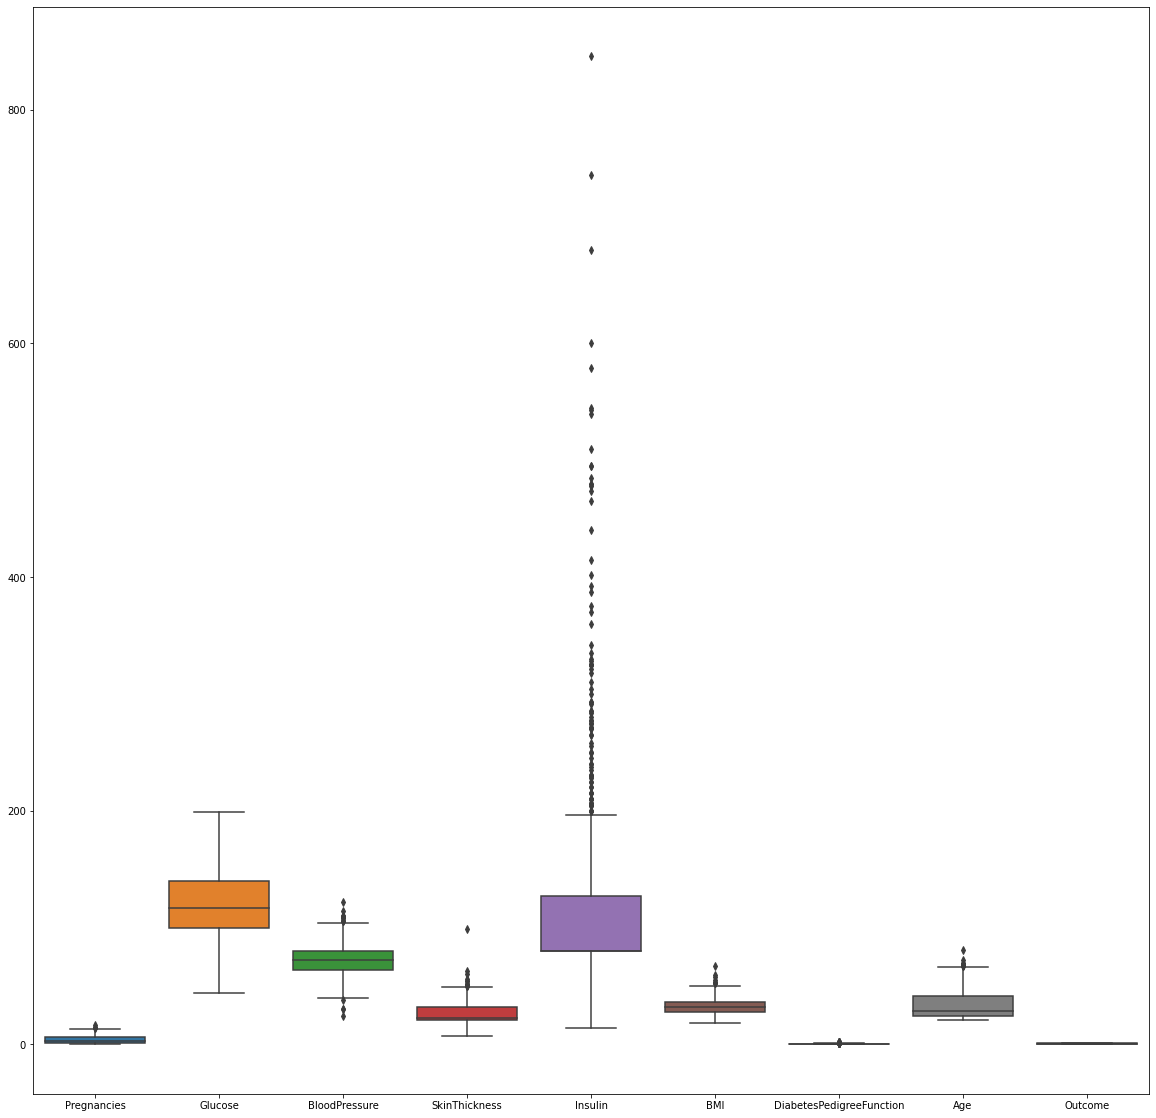

In [12]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=df, ax=ax)

In [13]:
q = df["Pregnancies"].quantile(0.98)
df_new = df[df["Pregnancies"] < q]

q = df_new["BMI"].quantile(0.99)
df_new = df_new[df_new["BMI"] < q]

q = df_new["SkinThickness"].quantile(0.99)
df_new = df_new[df_new["SkinThickness"] < q]

q = df_new["Insulin"].quantile(0.95)
df_new = df_new[df_new["Insulin"] < q]

q = df_new["DiabetesPedigreeFunction"].quantile(0.99)
df_new = df_new[df_new["DiabetesPedigreeFunction"] < q]

q = df_new["Age"].quantile(0.99)
df_new = df_new[df_new["Age"] < q]

<AxesSubplot:>

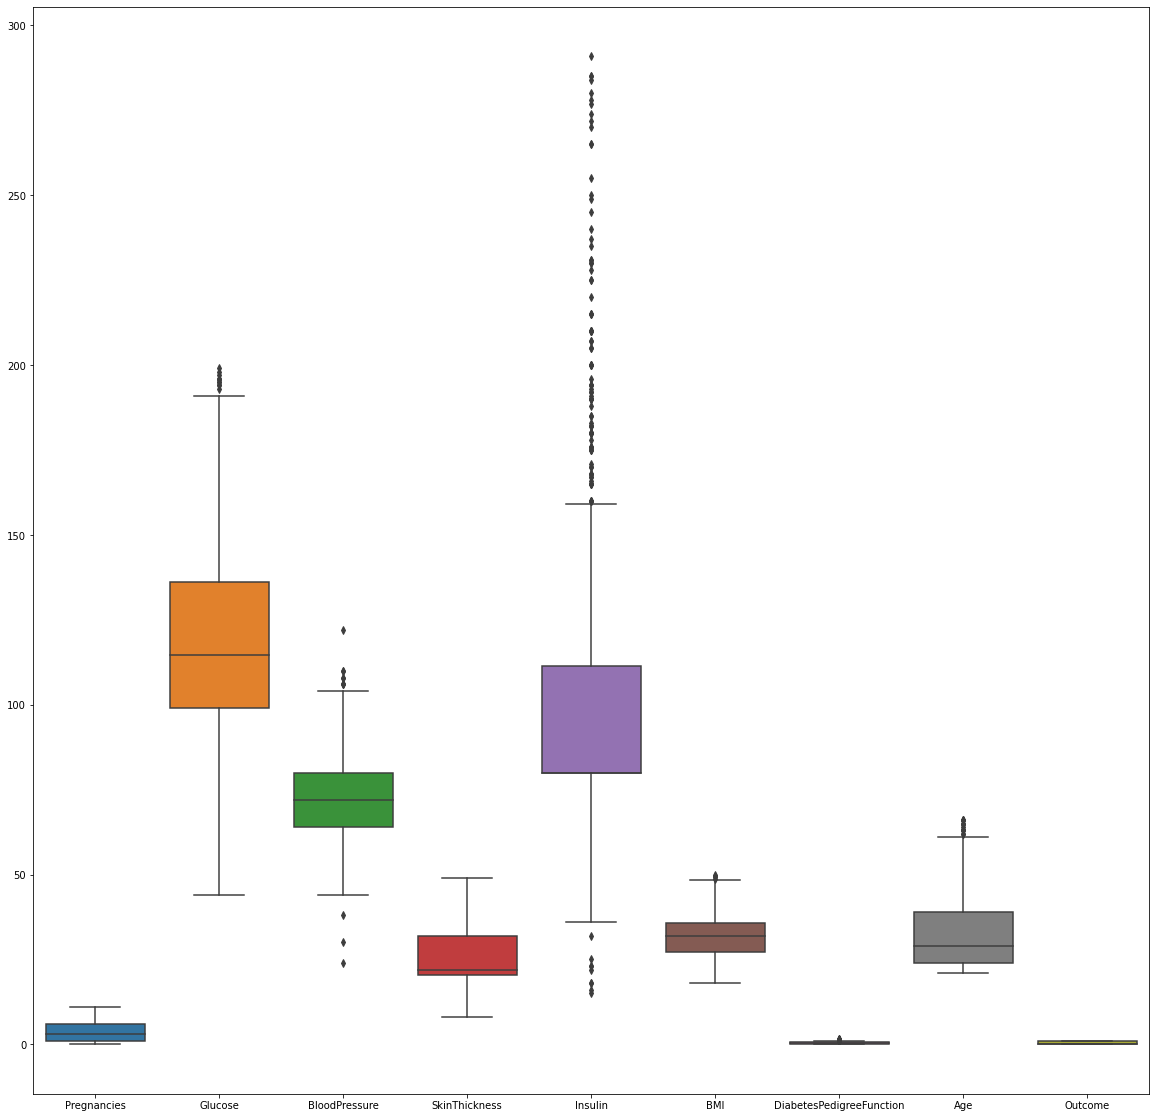

In [14]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=df_new, ax=ax)

In [15]:
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0


In [16]:
y = df_new["Outcome"]
x = df_new.drop(columns=["Outcome"])

In [17]:
scalar = StandardScaler()
arr = scalar.fit_transform(x)
df1 = pd.DataFrame(arr)
pf1 = ProfileReport(df1)
pf1.to_widgets()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
vif_df = pd.DataFrame()
vif_df["Column"] = x.columns
vif_df["score"] = [variance_inflation_factor(arr, i) for i in range(arr.shape[1])]
vif_df

,Column,score
0,Pregnancies,1.449056
1,Glucose,1.304263
2,BloodPressure,1.262686
3,SkinThickness,1.470049
4,Insulin,1.271017
5,BMI,1.513160
6,DiabetesPedigreeFunction,1.042300
7,Age,1.662728


In [19]:
x_train, x_test, y_train, y_test = train_test_split(arr, y, test_size=0.20, random_state=144)

In [43]:
logr = LogisticRegression(verbose=1, solver="liblinear")

In [44]:
logr.fit(x_train, y_train)

[LibLinear]iter  1 act 1.290e+02 pre 1.158e+02 delta 1.320e+00 f 3.736e+02 |g| 2.223e+02 CG   2
iter  2 act 1.450e+01 pre 1.265e+01 delta 1.320e+00 f 2.446e+02 |g| 4.988e+01 CG   3
iter  3 act 1.028e+00 pre 9.704e-01 delta 1.320e+00 f 2.301e+02 |g| 1.102e+01 CG   3
iter  4 act 1.170e-02 pre 1.163e-02 delta 1.320e+00 f 2.290e+02 |g| 1.181e+00 CG   2
iter  5 act 5.530e-05 pre 5.528e-05 delta 1.320e+00 f 2.290e+02 |g| 1.031e-01 CG   2
iter  6 act 8.867e-07 pre 8.866e-07 delta 1.320e+00 f 2.290e+02 |g| 8.266e-03 CG   3


LogisticRegression(solver='liblinear', verbose=1)

In [45]:
logr.predict([x_test[0]])

array([0])

In [46]:
logr.predict_proba([x_test[0]])

array([[0.83302391, 0.16697609]])

In [47]:
logr.predict_log_proba([x_test[0]])

array([[-0.18269294, -1.78990462]])

In [42]:
y_test.iloc[0]

1

In [48]:
logr_lbfgs = LogisticRegression(verbose=1)
logr_lbfgs.fit(x_train, y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73606D+02    |proj g|=  1.30987D+02

           * * *

Tit   = total number of iterations


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     11     12      1     0     0   5.866D-04   2.285D+02
  F =   228.47095901243765     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [49]:
logr_lbfgs

LogisticRegression(verbose=1)

In [50]:
logr

LogisticRegression(solver='liblinear', verbose=1)

In [51]:
y_pred_lib = logr.predict(x_test)
y_pred_lib

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0])

In [52]:
y_pred_lbfgs = logr_lbfgs.predict(x_test)
y_pred_lbfgs

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0])

In [53]:
confusion_matrix(y_test, y_pred_lib)

array([[77, 10],
       [24, 24]])

In [54]:
confusion_matrix(y_test, y_pred_lbfgs)

array([[77, 10],
       [24, 24]])

In [55]:
def model_eval(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tn+tp)/(tn+fp+fn+tp)
    precision=tp/(tp+fp)
    recall = tp/(tp+fn)
    specificity = tn/(fp+tn)
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "specificity": specificity
    }

In [56]:
model_eval(y_test, y_pred_lib)

{'accuracy': 0.7481481481481481,
 'precision': 0.7058823529411765,
 'recall': 0.5,
 'specificity': 0.8850574712643678}

In [57]:
model_eval(y_test, y_pred_lbfgs)

{'accuracy': 0.7481481481481481,
 'precision': 0.7058823529411765,
 'recall': 0.5,
 'specificity': 0.8850574712643678}

In [65]:
auc_lib = roc_auc_score(y_test, y_pred_lib)
auc_lib

0.692528735632184

In [59]:
roc_auc_score(y_test, y_pred_lbfgs)

0.692528735632184

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lib)

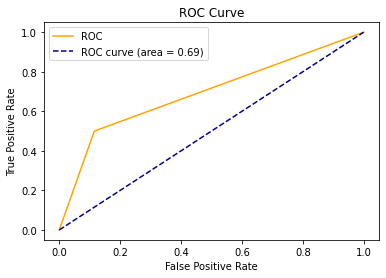

In [66]:
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1], [0, 1], color="darkblue", linestyle="--", label="ROC curve (area = %0.2f)" % auc_lib)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()